# Web Scraping do Site do Deenp

Desenvolvido por **Caio Henrique Ferreira Pereira** e **Rian Lucas Dias Guedes**

O trabalho consiste em utilizar elementos da programação orientada a objetos para extrair dados dos sites de docentes da Universidade Federal de Ouro Preto (UFOP). Logo, foi utilizado o site do Departamento de Engenharia de Produção de João Monlevade (DEENP) disponível no link: https://deenp.ufop.br/corpo-docente.

Os sites de docentes das universidades costumam ser recursos valiosos para estudantes e pesquisadores em busca de informações sobre os professores que ministram aulas e conduzem pesquisas em diversas áreas. Esses sites geralmente incluem:

**Lista de Docentes:** Uma lista completa dos professores do departamento, com seus nomes, títulos acadêmicos, áreas de especialização e informações de contato.

**Currículos Lattes:** Muitas vezes, os perfis dos docentes incluem links para seus currículos Lattes, que fornecem detalhes sobre sua formação acadêmica, experiência profissional, publicações e projetos de pesquisa.

**Disciplinas e Horários de Aula:** Informações sobre as disciplinas que cada professor ministra, bem como os horários e locais das aulas.

**Linhas de Pesquisa:** Uma descrição das áreas de pesquisa em que os docentes estão envolvidos, juntamente com informações sobre projetos de pesquisa em andamento.

**Publicações e Trabalhos:** Listagens de artigos, livros, capítulos de livros e outras publicações dos docentes, juntamente com links para acessá-los, quando disponíveis.

**Atividades Acadêmicas e Profissionais:** Detalhes sobre participações em comitês, orientações de estudantes, palestras e outras atividades acadêmicas e profissionais.

**Informações de Contato:** Endereço de e-mail e informações de escritório para que os alunos e outros interessados possam entrar em contato com os docentes.

Os elementos a serem observados são:

**Herança:**
A herança é um dos pilares da programação orientada a objetos (POO) que permite criar novas classes baseadas em classes existentes. Em outras palavras, uma classe derivada (ou subclasse) pode herdar atributos e métodos de uma classe base (ou superclasse). Isso promove a reutilização de código e a criação de hierarquias de classes.

**Polimorfismo:**
O polimorfismo permite que objetos de classes diferentes possam ser tratados de maneira uniforme. Isso é alcançado através do uso de métodos com o mesmo nome em classes diferentes, mas com comportamentos específicos para cada classe. O polimorfismo permite escrever código mais genérico e flexível, pois você pode tratar objetos de diferentes classes de forma consistente.

**Encapsulamento:**
O encapsulamento é um conceito que envolve a proteção dos detalhes internos de uma classe e o acesso controlado aos seus membros. Isso é alcançado através do uso de modificadores de acesso, como público, privado e protegido. A ideia é ocultar a complexidade interna de uma classe e fornecer uma interface pública que permita a interação com os objetos dessa classe de forma segura e controlada. Isso ajuda a prevenir acesso não autorizado e facilita a manutenção do código.

**Abstração:**
A abstração é o processo de simplificar complexidades desnecessárias, focando nos aspectos mais relevantes de um objeto ou sistema. Em programação orientada a objetos, a abstração envolve a criação de classes e objetos que representam entidades do mundo real de forma simplificada.

## Importação de Bibliotecas

A importação de bibliotecas desempenha um papel fundamental no processo de web scraping, uma técnica amplamente utilizada para extrair dados de sites da web de forma automatizada. Para realizar com eficiência essa tarefa, os desenvolvedores frequentemente importam bibliotecas como BeautifulSoup e Requests em Python, que oferecem ferramentas poderosas para analisar a estrutura HTML das páginas da web e fazer requisições HTTP para recuperar seu conteúdo. Além disso, a escolha e importação adequadas dessas bibliotecas são passos cruciais para o sucesso do web scraping, permitindo aos desenvolvedores coletar dados valiosos de maneira eficaz e ética.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

print("bibliotecas carregadas com sucesso!!!")

bibliotecas carregadas com sucesso!!!


## Iniciando a requisição

In [2]:
link = 'https://deenp.ufop.br/corpo-docente'
requisição = requests.get(link)
site = BeautifulSoup(requisição.text, "html.parser")

print("Requisição concluída com sucesso!!!")

Requisição concluída com sucesso!!!


## Manipulação e Tratamento de Dados

In [4]:
pesquisa = site.find_all("tr")

data = []
column_names = ["Nome do Professor", "Vazia", "Vazia", "Área", "Ramal", "Sala", "E-mail"]

for tr in pesquisa:
    row = []
    for td in tr.find_all("td"):
        td_text = td.get_text().replace('\n', '').replace('\t', '')  # Remova \n e \t
        row.append(td_text)
    data.append(row)

# Crie um DataFrame com os dados e nomes de colunas
df = pd.DataFrame(data, columns=column_names)

# Remove as colunas renomeadas como "Vazia"
df = df.drop(columns=["Vazia"])

# Remove linhas com valores ausentes em qualquer coluna
df = df.dropna()

# Ajuste as opções de exibição
pd.set_option('display.max_columns', None)  # Exibir todas as colunas
pd.set_option('display.expand_frame_repr', False)  # Não quebrar linhas ao exibir o DataFrame

# Imprima o DataFrame no formato de tabela
print(df["Nome do Professor"])

1          Profa. Dra. Alana Deusilan Sester Pereira
2                 Prof. Dr. Alexandre Xavier Martins
3                 Profa. Ma. Aline Mara Alves Soares
4             Profa. Ma. Carla Danielle Araújo Costa
5         Profa. Dra. Cinthia Versiani Scott Varella
6                Profa. Dra. Clarissa Barros da Cruz
7                       Profa. Dra. Eva Bessa Soares
8     Prof. Dr. Frederíco César de Vasconcelos Gomes
9               Prof. Dr. Gilberto de Miranda Júnior
10                  Prof. Dr. June Marques Fernandes
11                    Profa. Dra. Luciana Paula Reis
12             Prof. Me. Marco Túlio Domingues Costa
13          Profa. Ma. Maressa Nunes Ribeiro Tavares
14                      Profa. Dra. Mônica do Amaral
15          Prof. Dr. Paganini Barcellos de Oliveira
16              Prof. Dr. Rafael Lucas Machado Pinto
17               Profa. Dra. Rita de Cássia Oliveira
18                Prof. Dr. Sérgio Evangelista Silva
19        Prof. Dr. Thiago Augusto de Oliveira

In [5]:
print(df["Área"])

1                             ENGENHARIA ORGANIZACIONAL
2                                  PESQUISA OPERACIONAL
3     ENGENHARIA ORGANIZACIONAL / ENGENHARIA DA SUST...
4     ENGENHARIA ORGANIZACIONAL / ENGENHARIA DO TRAB...
5     ENGENHARIA DA SUSTENTABILIDADE /  ENGENHARIA D...
6     ENGENHARIA DA QUALIDADE / ENGENHARIA DE OPERAÇÕES
7     ENGENHARIA ORGANIZACIONAL / ENGENHARIA DO TRAB...
8     ENGENHARIA ORGANIZACIONAL / ENGENHARIA DO TRAB...
9                      LOGÍSTICA / PESQUISA OPERACIONAL
10       ENGENHARIA ECONÔMICA / ENGENHARIA DE OPERAÇÕES
11    ENGENHARIA DO PRODUTO / ENGENHARIA DA QUALIDAD...
12    ENGENHARIA ECONÔMICA / ENGENHARIA DE OPERAÇÕES...
13    ENGENHARIA DE OPERAÇÕES / ENGENHARIA DA QUALID...
14                     PESQUISA OPERACIONAL / LOGÍSTICA
15                                 ENGENHARIA ECONÔMICA
16    ENGENHARIA DA QUALIDADE / ENGENHARIA DE PROCES...
17                            ENGENHARIA ORGANIZACIONAL
18    ENGENHARIA ORGANIZACIONAL / ENGENHARIA DE 

In [6]:
print(df["Ramal"])

1     0838
2     0877
3     0838
4        -
5     0879
6     0808
7     0808
8     0877
9     0878
10    0821
11    0821
12    0879
13    0813
14    0824
15    0830
16    0829
17    0880
18    0811
19    0810
20    0810
22    0817
Name: Ramal, dtype: object


In [7]:
print(df["Sala"])

1     A207
2     A401
3     A207
4        -
5     A403
6     A104
7     A104
8     A401
9     A408
10    A208
11    A208
12    A403
13    A312
14    A204
15    A102
16    A101
17    A405
18    A203
19    A201
20    A201
22    A213
Name: Sala, dtype: object


In [8]:
print(df["E-mail"])

1                alana@ufop.edu.br
2             xmartins@ufop.edu.br
3         aline.soares@ufop.edu.br
4                carla@ufop.edu.br
5      cinthiaversiani@ufop.edu.br
6        clarissa.cruz@ufop.edu.br
7                  eva@ufop.edu.br
8            frederico@ufop.edu.br
9      gilberto.junior@ufop.edu.br
10                june@ufop.edu.br
11        lucianapaula@ufop.edu.br
12         marco.costa@ufop.edu.br
13             maressa@ufop.edu.br
14       monica.amaral@ufop.edu.br
15            paganini@ufop.edu.br
16         rafaellucas@ufop.edu.br
17             rcassia@ufop.edu.br
18        sergio.silva@ufop.edu.br
19              thiago@ufop.edu.br
20              wagner@ufop.edu.br
22    secretaria.deenp@ufop.edu.br
Name: E-mail, dtype: object


## Resultados

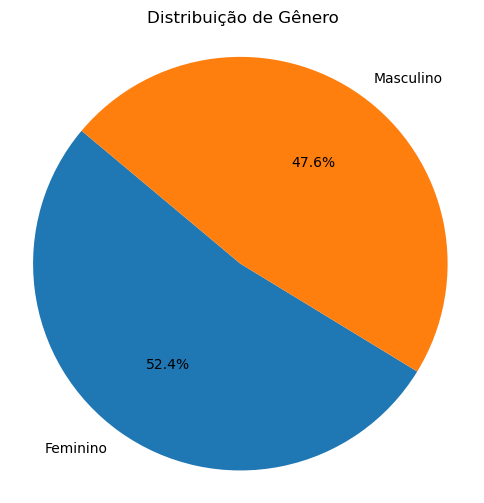

In [9]:
data = []
column_names = ["Nome do Professor", "Vazia", "Vazia", "Área", "Ramal", "Sala", "E-mail"]

# Suponha que 'pesquisa' seja uma lista de objetos BeautifulSoup com os dados da página HTML

for tr in pesquisa:
    row = []
    for td in tr.find_all("td"):
        td_text = td.get_text().replace('\n', '').replace('\t', '')  # Remova \n e \t
        row.append(td_text)
    data.append(row)

# Crie um DataFrame com os dados e nomes de colunas
df = pd.DataFrame(data, columns=column_names)

# Remove as colunas renomeadas como "Vazia"
df = df.drop(columns=["Vazia"])

# Remove linhas com valores ausentes em qualquer coluna
df = df.dropna()

# Função para extrair a terceira palavra da string
def extract_third_word(name):
    words = name.split()
    if len(words) >= 3:
        return words[2]
    else:
        return ''

# Aplicar a função para criar uma nova coluna "Terceira Palavra"
df['Terceira Palavra'] = df['Nome do Professor'].apply(extract_third_word)

# Função para determinar o gênero com base na terceira palavra
def determine_gender(word):
    if word.endswith('a'):
        return 'Feminino'
    elif word.endswith('ne'):
        return 'Feminino'
    else:
        return 'Masculino'

# Aplicar a função para criar uma nova coluna "Gênero"
df['Gênero'] = df['Terceira Palavra'].apply(determine_gender)

# Contar os valores únicos na coluna "Gênero"
gender_counts = df['Gênero'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Gênero')
plt.axis('equal')  # Para garantir que o gráfico seja circular

# Mostrar o gráfico
plt.show()

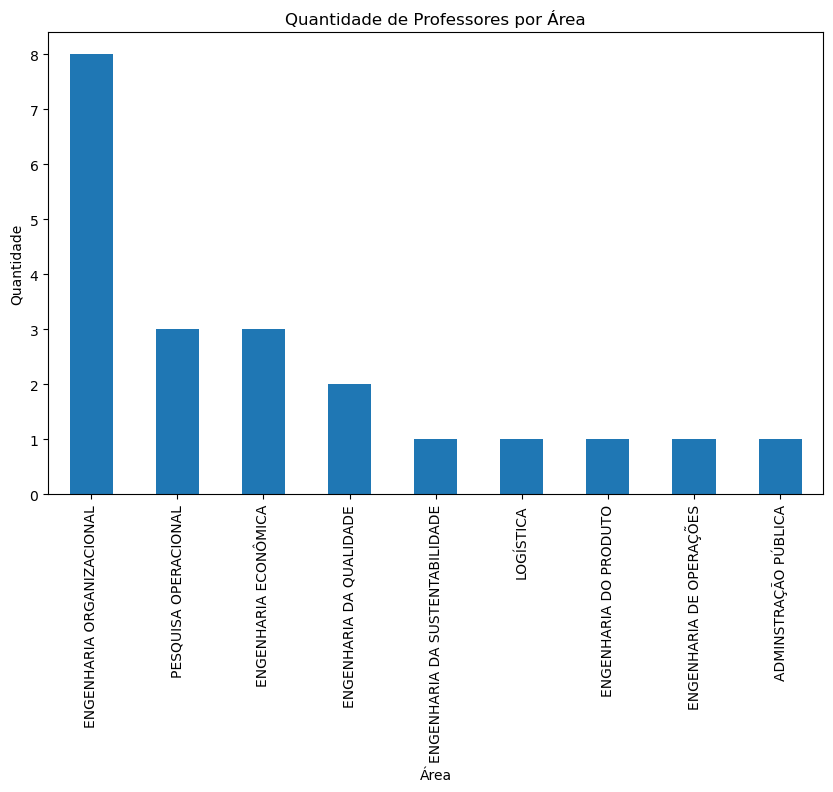

In [10]:
data = []
column_names = ["Nome do Professor", "Vazia", "Vazia", "Área", "Ramal", "Sala", "E-mail"]

for tr in pesquisa:
    row = []
    for td in tr.find_all("td"):
        td_text = td.get_text().replace('\n', '').replace('\t', '')  # Remova \n e \t
        row.append(td_text)
    data.append(row)

# Crie um DataFrame com os dados e nomes de colunas
df = pd.DataFrame(data, columns=column_names)

# Remove as colunas renomeadas como "Vazia"
df = df.drop(columns=["Vazia"])

# Remove linhas com valores ausentes em qualquer coluna
df = df.dropna()

# Modificar a coluna "Área" para manter apenas a parte antes da primeira "/"
df["Área"] = df["Área"].str.split("/").str[0].str.strip()

# Contar a frequência das áreas
area_counts = df["Área"].value_counts()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
area_counts.plot(kind='bar')
plt.title('Quantidade de Professores por Área')
plt.xlabel('Área')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.show()

In [11]:
# Contar a quantidade de ramais sem repetir
quantidade_ramais = df["Ramal"].nunique()

# Imprimir a quantidade de ramais
print(f"Quantidade de ramais: {quantidade_ramais}")

# Contar a quantidade de ramais sem repetir
quantidade_salas = df["Sala"].nunique()

# Imprimir a quantidade de ramais
print(f"Quantidade de salas: {quantidade_salas}")

Quantidade de ramais: 15
Quantidade de salas: 15
